In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Combined_News_DJIA.csv")

In [3]:
# Set Date as index
df.index = df["Date"]
df.drop("Date", axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1989 entries, 2008-08-08 to 2016-07-01
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1989 non-null   int64 
 1   Top1    1989 non-null   object
 2   Top2    1989 non-null   object
 3   Top3    1989 non-null   object
 4   Top4    1989 non-null   object
 5   Top5    1989 non-null   object
 6   Top6    1989 non-null   object
 7   Top7    1989 non-null   object
 8   Top8    1989 non-null   object
 9   Top9    1989 non-null   object
 10  Top10   1989 non-null   object
 11  Top11   1989 non-null   object
 12  Top12   1989 non-null   object
 13  Top13   1989 non-null   object
 14  Top14   1989 non-null   object
 15  Top15   1989 non-null   object
 16  Top16   1989 non-null   object
 17  Top17   1989 non-null   object
 18  Top18   1989 non-null   object
 19  Top19   1989 non-null   object
 20  Top20   1989 non-null   object
 21  Top21   1989 non-null   object
 22  Top22   1989 n

In [5]:
df_null = df.isnull().sum()
df_null[df_null>0]

,0
Top23,1
Top24,3
Top25,3


In [6]:
# Filtering rows with missing values
df_null_content = df[df.isnull().any(axis=1)]
df_null_content

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2009-09-15,1,b'The Church of Scientology won\'t be dissolve...,b'New virus from rats can kill 80 per cent of ...,b'The gruesome spectacle of dolphins being sla...,b'The End of Innocence in Afghanistan: \'The G...,b'France approves Internet piracy bill',b'The Rural Doctors Association says right now...,b'Al Jazeera English - Africa - Shabab to aven...,"b""How Sri Lanka governs through detentions - S...",b'Two months after the Pakistani Army wrested ...,...,b'In an equine echo of the controversy surroun...,b'UPDATE: 5-New York homes raided in terrorism...,b'Population Growth Impeding Progress on the M...,b'Global Population to Reach 7 Billion by 2011',b'Government Funded Feminist Porn ',b'Can someone enlighten me re:Holy Land disput...,b'Human Rights Watch official suspended for co...,NaN,NaN,NaN
2009-12-24,1,b'Woman knocks down Pope Benedict at Christmas...,b'Ugandan President Museveni says he will bloc...,"b""Venezuela's Chavez threatens to kick out car...",b'Woman who knocked down pope had pasta in her...,"b'450 people from 21 countries, including 30 f...",b'Chvez declares Angel Falls is no more: World...,b'Drug tests catch out 10 police (UK)',"b'Once the worlds fourth-largest lake, the Ara...","b""Cool Saudi Feminist calls for woman's right ...",...,b'Pig farts spark Australia gas scare - I shit...,b'Bin Laden daughter flees to Saudi embassy in...,b'Traumatic Brain Injuries: Growing evidence ...,b'The Pakistan Supreme Court has ordered the P...,"b""Here's a video the Taliban released this mor...",b'Fireworks set off aboard airliner',"b'Five VA men may face terrorism charges, Paki...","b""Ayatollah Montazeri's Legacy: In death he m...",NaN,NaN
2011-04-21,1,"Director of ""Restrepo"" and Photographer Chris ...",Everyone within 20km of Fukushima will be forc...,Bahrain: Activist Zaynab Al-Khawaja's letter t...,"More than 80,000 people are claiming incapacit...",Libya: 'mission creep' claims as UK sends in m...,Japan considers banning access to evacuation zone,Chinese oil giant Sinopec has stopped exportin...,6.0-magnitude earthquake strikes off east coas...,Next war in line: At least 20 South Sudanese a...,...,Russian migration official fired in racism row...,Small amounts of radioactive iodine found in b...,"War photographer, Oscar-nominated film directo...",Effeminate boys are being sent to a special ca...,Japan Government Declares 12-Mile Area Around ...,TEPCO admitted Wednesday that nuclear fuel in ...,Fukushima evacuees face arrest if they return ...,Prince Charles wins some kind of a record,NaN,NaN


In [7]:
# convert each observation into count word
col = df.columns[1:]
df[col] = df[col].astype(str)

def count_word(text):
  return len(text.split())

for i in col:
  df[f"{i}_word_counts"] = df[i].apply(count_word)

In [8]:
df_count = df.iloc[:,-25:]

In [9]:
df_count

,Top1_word_counts,Top2_word_counts,Top3_word_counts,Top4_word_counts,Top5_word_counts,Top6_word_counts,Top7_word_counts,Top8_word_counts,Top9_word_counts,Top10_word_counts,...,Top16_word_counts,Top17_word_counts,Top18_word_counts,Top19_word_counts,Top20_word_counts,Top21_word_counts,Top22_word_counts,Top23_word_counts,Top24_word_counts,Top25_word_counts
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,12,5,13,20,22,14,13,30,14,9,...,19,4,31,20,20,16,7,16,8,6
2008-08-11,20,7,12,17,5,12,8,17,9,8,...,8,13,15,7,5,6,14,10,7,11
2008-08-12,14,4,11,22,7,11,10,26,33,9,...,16,7,16,7,17,6,14,22,4,10
2008-08-13,9,24,8,21,24,10,14,6,30,10,...,4,14,6,7,8,5,11,9,15,11
2008-08-14,10,12,12,17,13,13,10,15,10,9,...,8,15,17,6,11,8,7,8,8,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,12,11,9,8,8,9,11,11,37,17,...,9,30,21,6,10,35,12,10,25,9
2016-06-28,16,32,11,6,16,11,15,11,11,30,...,13,12,31,42,11,8,43,10,5,40
2016-06-29,5,13,10,41,14,13,7,7,6,37,...,11,24,10,22,29,8,14,21,8,13


<ipython-input-10-156f380216e8>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box.set_xticklabels(range(1,26))


Text(0, 0.5, 'Counts')

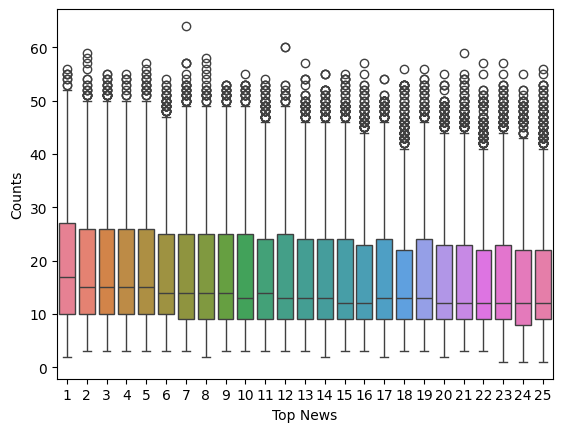

In [10]:
box = sns.boxplot(data=df_count)
box.set_xticklabels(range(1,26))
box.set_xlabel("Top News")
box.set_ylabel("Counts")

Most of the text are not more than 30 words. Outliers are less than 70 words per news.


# Preprocessing text

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem import PorterStemmer
import re
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
# Remove the basic characters
def clean(raw):
  """ Remove hyperlinks and markup """
  result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
  result = re.sub('&gt;', "", result)
  result = re.sub('&#x27;', "'", result)
  result = re.sub('&quot;', '"', result)
  result = re.sub('&#x2F;', ' ', result)
  result = re.sub('<p>', ' ', result)
  result = re.sub('</i>', '', result)
  result = re.sub('&#62;', '', result)
  result = re.sub('<i>', ' ', result)
  result = re.sub("\n", '', result)
  return result

In [13]:
# Remove the numeric
def remove_num(raw):
  """ Remove numbers """
  result = re.sub(r'\d+', '', raw)
  return result

In [14]:
# Unify the whitespaces
def unify_whitespaces(raw):
    result = re.sub(' +', ' ', raw)
    return result

In [15]:
# Remove the symbols
def remove_symbols(raw):
    result = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', raw)
    return result

In [16]:
# Remove the punctuation
def remove_punctuation(raw):
    result = "".join(u for u in raw if u not in ("?", ".", ";", ":",  "!",'"',','))
    return result

In [17]:
# Remove the emoji
def remove_emoji(raw):
    emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U0001F1F2"
                        u"\U0001F1F4"
                        u"\U0001F620"
                        u"\u200d"
                        u"\u2640-\u2642"
                        u"\u2600-\u2B55"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                        u"\U00002500-\U00002BEF"  # Chinese char
                        u"\U00010000-\U0010ffff"
                        "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', raw)

In [18]:
# Remove the stopword and process lemmatizing
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

In [19]:
def lemma_word(text):
   lemma_text=[lemma.lemmatize(word, pos=wordnet.VERB) for word in text.split()]
   return " ".join(lemma_text)

In [20]:
def preprocess_text(text, df=df):
  text = str(text).lower()
  text = clean(text)
  text = remove_num(text)
  text = unify_whitespaces(text)
  text = remove_symbols(text)
  text = remove_punctuation(text)
  text = remove_emoji(text)
  text = remove_stopword(text)
  text = lemma_word(text)
  return text

In [21]:
for i in col:
  df[f"{i}_text"] = df[i].apply(preprocess_text)

In [22]:
col

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [23]:
# Concat label column

df_text = df.iloc[:,-25:]
df1 = pd.concat([df["Label"],df_text],axis=1)

In [24]:
df1

,Label,Top1_text,Top2_text,Top3_text,Top4_text,Top5_text,Top6_text,Top7_text,Top8_text,Top9_text,...,Top16_text,Top17_text,Top18_text,Top19_text,Top20_text,Top21_text,Top22_text,Top23_text,Top24_text,Top25_text
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,b georgia down two russian warplanes countries...,b break musharraf impeach,b russia today columns troop roll south osseti...,b russian tank move towards capital south osse...,b afghan children rap impunity un official say...,b russian tank enter south ossetia whilst geor...,b break georgia invade south ossetia russia wa...,b enemy combatent trials nothing sham salim ha...,b georgian troop retreat osettain capital pres...,...,b georgia invade south ossetia russia get invo...,b al qaeda face islamist backlash,b condoleezza rice us would act prevent israel...,b busy day european union approve new sanction...,b georgia withdraw soldier iraq help fight rus...,b pentagon think attack iran bad idea us news ...,b caucasus crisis georgia invade south ossetia,b indian shoe manufactory series like work,b visitors suffer mental illnesses ban olympics,b help mexico kidnap surge
2008-08-11,1,b wont america nato help us wont help us help ...,b bush put foot georgian conflict,b jewish georgian minister thank israeli train...,b georgian army flee disarray russians advance...,b olympic open ceremony fireworks fake,b mossad fraudulent new zealand passports iraq,b russia anger israeli military sale georgia,b american citizen live sossetia blame us geor...,b welcome world war iv high definition,...,b israel us behind georgian aggression,b believe tv neither russian georgian much vic...,b riot still go montreal canada police murder ...,b china overtake us largest manufacturer,b war south ossetia pics,b israeli physicians group condemn state torture,b russia beat unite state head peak oil,b perhaps question georgia russia conflict,b russia much better war,b come trade sex food
2008-08-12,0,b remember adorable year old sing open ceremon...,b russia end georgia operation,b sexual harassment would children,b al qa eda lose support iraq brutal crackdown...,b ceasefire georgia putin outmaneuver west,b microsoft intel try kill xo laptop,b stratfor russo georgian war balance power,b try get sense whole georgia russia war vote ...,b us military surprise time swiftness russian ...,...,b us troop still georgia know georgia first place,b russias response georgia right,b gorbachev accuse us make serious blunder pur...,b russia georgia nato cold war two,b remember adorable year old lead country war ...,b war georgia israeli connection,b sign point us encourage georgia invade south...,b christopher king argue us nato behind georgi...,b america new mexico,b bbc news asia pacific extinction man climate
2008-08-13,0,b us refuse israel weapons attack iran report,b president order attack tskhinvali capital so...,b israel clear troop kill reuters cameraman,b britain policy tough drug pointless say form...,b body year old find trunk latest ransom pay k...,b china move million quake survivors prefab home,b bush announce operation get russia grill yea...,b russian force sink georgian ship,b commander navy air reconnaissance squadron p...,...,b elephants extinct,b us humanitarian missions soon georgia russia...,b georgia ddos come us source,b russian convoy head georgia violate truce,b israeli defence minister us strike iran,b gorbachev choice,b witness russian force head towards tbilisi b...,b quarter russians blame us conflict poll,b georgian president say us military take cont...,b nobel laureate aleksander solzhenitsyn accus...
2008-08-14,1,b experts admit legalise drug,b war south osetia picture make russian soldier,b swedish wrestler ara abrahamian throw away m...,b russia exaggerate death toll south ossetia o...,b missile kill inside pakistan may launch cia,b rushdie condemn random house refusal publish...,b poland us agree missle defense deal interest...,b russians conquer tblisi bet seriously bet,b russia exaggerate s

In [25]:
# Pipeline the score of the text
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

def sentiment_score(text):
  info = sentiment_pipeline(text)
  score = info[0]["score"]

  if info[0]["label"] == "NEGATIVE":
    score *= -1
  return score

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [26]:
col_text = df_text.columns

In [27]:
for i in col_text:
  df_text[f"{i}_score"] = df_text[i].apply(lambda x: sentiment_score(x[:100]))

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [28]:
df_sentiment = df_text.iloc[:,-25:]
df_sentiment

,Top1_text_score,Top2_text_score,Top3_text_score,Top4_text_score,Top5_text_score,Top6_text_score,Top7_text_score,Top8_text_score,Top9_text_score,Top10_text_score,...,Top16_text_score,Top17_text_score,Top18_text_score,Top19_text_score,Top20_text_score,Top21_text_score,Top22_text_score,Top23_text_score,Top24_text_score,Top25_text_score
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,-0.964808,-0.985489,-0.971215,-0.996842,-0.997577,-0.930865,-0.971966,-0.989825,-0.997365,-0.979366,...,-0.960060,-0.993966,-0.983356,-0.808222,-0.982669,-0.996075,-0.969249,-0.639686,-0.992964,-0.951445
2008-08-11,0.974520,-0.967665,0.958853,-0.915744,-0.999582,-0.996608,-0.991452,-0.956700,0.999715,-0.999738,...,-0.855660,-0.999369,-0.832496,-0.962607,-0.986501,-0.977194,0.754425,-0.979855,-0.963462,-0.958401
2008-08-12,-0.992681,-0.923743,-0.992213,-0.992297,0.903739,-0.998434,0.993231,-0.990236,-0.818298,-0.998098,...,0.981218,0.998109,-0.991254,-0.874547,-0.996305,0.762044,-0.987300,-0.990085,-0.722621,-0.960155
2008-08-13,-0.976532,-0.985629,-0.994528,-0.995790,-0.990801,0.966764,0.993838,-0.999269,0.970895,-0.976429,...,-0.996878,-0.992087,-0.989167,-0.993375,-0.984098,0.997511,-0.886113,-0.985575,-0.986942,-0.973636
2008-08-14,-0.555570,0.951600,-0.936091,-0.987796,-0.981642,-0.965927,-0.990457,-0.606501,-0.983602,-0.991312,...,-0.938247,-0.981362,-0.956006,-0.976178,-0.984982,-0.980374,-0.983479,-0.916973,-0.992477,-0.957782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,-0.992469,-0.815556,-0.996023,0.983746,0.999374,-0.997493,-0.998953,-0.974955,-0.997247,-0.997480,...,-0.963828,-0.884828,-0.975054,-0.998630,-0.580094,-0.987894,-0.997813,-0.992393,-0.908196,-0.853248
2016-06-28,-0.985203,-0.986884,-0.985302,0.968483,-0.999154,-0.999255,0.964802,-0.946859,-0.571621,-0.953099,...,0.978724,0.949014,-0.999759,0.997626,-0.993824,-0.970953,0.777695,0.679704,-0.968680,-0.970908
2016-06-29,0.959281,-0.880414,0.975899,-0.996765,-0.936188,-0.975195,-0.991628,0.932063,0.999130,0.701554,...,-0.982419,-0.998973,-0.953111,-0.971108,0.993104,-0.994600,-0.999802,-0.992352,-0.862117,0.749562


In [29]:
# Save the sentiment score in csv file
df_sentiment.to_csv('df_sentiment.csv')

In [30]:
positive_counts = df_sentiment.apply(lambda col: (col > 0).sum())
print(positive_counts)

Top1_text_score     324
Top2_text_score     318
Top3_text_score     320
Top4_text_score     328
Top5_text_score     332
Top6_text_score     336
Top7_text_score     316
Top8_text_score     336
Top9_text_score     317
Top10_text_score    323
Top11_text_score    331
Top12_text_score    321
Top13_text_score    346
Top14_text_score    313
Top15_text_score    347
Top16_text_score    352
Top17_text_score    337
Top18_text_score    336
Top19_text_score    327
Top20_text_score    351
Top21_text_score    294
Top22_text_score    331
Top23_text_score    346
Top24_text_score    364
Top25_text_score    338
dtype: int64


In [31]:
df_sentiment.iloc[:,:11].mean(axis=1)

,0
Date,
2008-08-08,-0.979859
2008-08-11,-0.443194
2008-08-12,-0.618519
2008-08-13,-0.445600
2008-08-14,-0.729831
...,...
2016-06-27,-0.616018
2016-06-28,-0.590274
2016-06-29,0.071172
